In [1]:
import pandas as pd

# Charger les fichiers CSV
train = pd.read_csv('/kaggle/input/ghana-crop-disease/Train.csv')
test = pd.read_csv('/kaggle/input/ghana-crop-disease/Test.csv')

# Afficher les premières lignes du fichier d'entraînement
print("Train Data:")
print(train.head())

# Afficher les premières lignes du fichier de test
print("\nTest Data:")
print(test.head())

# Afficher les informations sur les colonnes
print("\nTrain Data Info:")
print(train.info())


Train Data:
        Image_ID  confidence                  class         ymin        xmin  \
0  id_11543h.jpg         1.0  Pepper_Bacterial_Spot   194.649671  328.803454   
1  id_11543h.jpg         1.0  Pepper_Bacterial_Spot   149.632401  256.768914   
2  id_11543h.jpg         1.0  Pepper_Bacterial_Spot   234.046875  327.138158   
3  id_11543h.jpg         1.0  Pepper_Bacterial_Spot   221.277138  340.411184   
4  id_11ee1c.jpg         1.0        Pepper_Fusarium  2000.563598  989.588908   

          ymax         xmax  
0   208.107730   341.967928  
1   162.910362   266.195724  
2   252.712993   338.876645  
3   238.593750   354.651316  
4  2184.252196  1401.748952  

Test Data:
        Image_ID  confidence  class  ymin  xmin  ymax  xmax
0  id_128pxx.jpg         NaN    NaN   NaN   NaN   NaN   NaN
1  id_12jbci.jpg         NaN    NaN   NaN   NaN   NaN   NaN
2  id_143s4o.jpg         NaN    NaN   NaN   NaN   NaN   NaN
3  id_14tfmb.jpg         NaN    NaN   NaN   NaN   NaN   NaN
4  id_14tw4o.jp

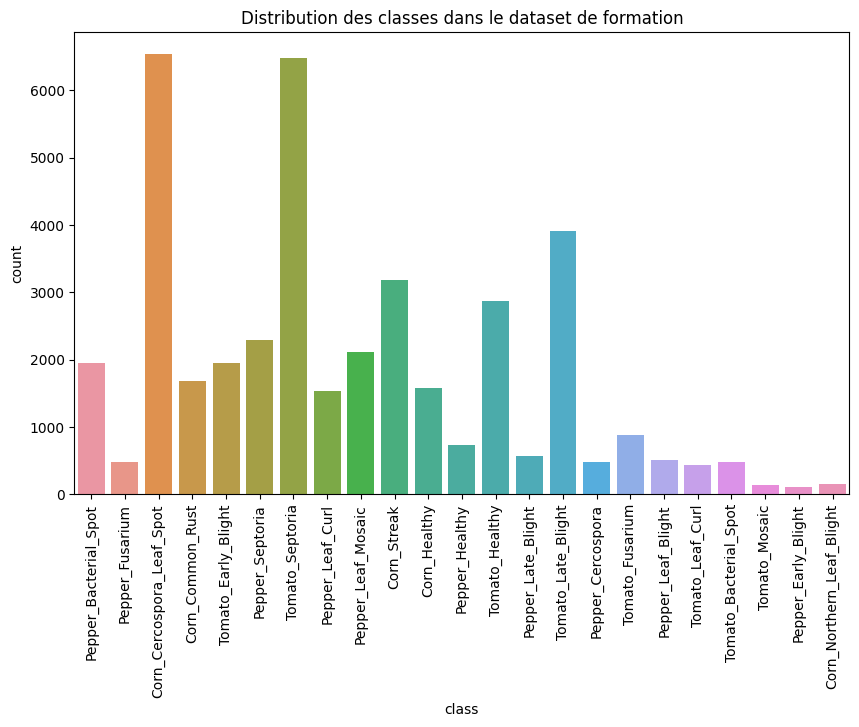

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
#train = pd.read_csv('/content/Train.csv')

# Visualiser la distribution des classes
plt.figure(figsize=(10,6))
sns.countplot(x='class', data=train)
plt.title('Distribution des classes dans le dataset de formation')
plt.xticks(rotation=90)
plt.show()

# Analyser les dimensions des images (si disponibles)
train['image_path'] = '/content/images/' + train['Image_ID']


In [20]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler


# Identifier les colonnes de caractéristiques et la cible
X = train.drop(columns=['class'])  # Ici, "label" est supposé être la colonne cible, ajuste selon ton dataset
y = train['class']  # Colonne des classes cibles

# Vérifier la distribution des classes avant le sur-échantillonnage
print("\nDistribution des classes avant over-sampling:")
print(y.value_counts())

# Appliquer le Random Over-Sampling pour équilibrer les classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Créer un nouveau DataFrame après over-sampling
train_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['class'])], axis=1)

# Vérifier la distribution des classes après le sur-échantillonnage
print("\nDistribution des classes après over-sampling:")
print(train_resampled['class'].value_counts())

# Afficher les premières lignes du nouveau dataset sur-échantillonné
print("\nTrain Data Resampled:")
print(train_resampled.head())



Distribution des classes avant over-sampling:
class
Corn_Cercospora_Leaf_Spot    6538
Tomato_Septoria              6483
Tomato_Late_Blight           3918
Corn_Streak                  3180
Tomato_Healthy               2872
Pepper_Septoria              2295
Pepper_Leaf_Mosaic           2113
Tomato_Early_Blight          1946
Pepper_Bacterial_Spot        1943
Corn_Common_Rust             1682
Corn_Healthy                 1571
Pepper_Leaf_Curl             1530
Tomato_Fusarium               882
Pepper_Healthy                736
Pepper_Late_Blight            575
Pepper_Leaf_Blight            508
Tomato_Bacterial_Spot         484
Pepper_Cercospora             472
Pepper_Fusarium               472
Tomato_Leaf_Curl              437
Corn_Northern_Leaf_Blight     157
Tomato_Mosaic                 134
Pepper_Early_Blight           101
Name: count, dtype: int64

Distribution des classes après over-sampling:
class
Pepper_Bacterial_Spot        6538
Tomato_Healthy               6538
Pepper_Early_Bligh